In [1]:
%load_ext autoreload
%autoreload 2

import os 
import shutil
import numpy as n
from datetime import date
from matplotlib import pyplot as plt
import time
import napari

In [3]:
os.chdir('/home/ali/packages/s2p-lbm/')

from suite3d.job import Job
from suite3d import lbmio, utils, ui
from suite3d import tiff_utils as tfu
from suite3d import file_utils as flu

In [4]:
job_params = {    
    'notch_filt' :     None,
    'planes' :         n.arange(0,15),
    'n_ch_tif' : 15,
    'convert_plane_ids_to_channel_ids' : False,
    'fix_fastZ' : True,
    
    'n_init_files' :   1,
    'init_file_pool' : None,
    'init_file_sample_method': 'random',
    
    'subtract_crosstalk' : False,
    'override_crosstalk' : None,
    'crosstalk_n_planes' : 10, 
    
    'nonrigid' : True,
    'smooth_sigma' : 1.15,
    'maxregshift' : 0.15,
    'reg_filter_pcorr' : 1,
    'generate_sample_registered_bins' : False,

    'dtype' : n.float32,
    'tif_batch_size' : 1,
}



In [5]:
subjects_dir =   '/mnt/zaru-subjects/'
expt_info = { 
    'subject':         'AH010',
    'date' :          '2024-01-17',
    'expnum' :         ['Structural'],}

tifs, si_params, exp_str = flu.find_exp(subjects_dir, **expt_info, verbose=False)

job_params['fs'] = si_params['vol_rate']

savedir = os.path.join('/mnt/md0/runs', expt_info['subject'], expt_info['date'])
os.makedirs(savedir, exist_ok=True)

In [7]:
# Create the job
job = Job(savedir,exp_str, tifs = tifs,
          params=job_params, create=False, overwrite=True, verbosity = 3)

   Found and loaded params from /mnt/md0/runs/AH010/2024-01-17/s3d-AH010_2024-01-17_Structural/params.npy


In [8]:
# optional parameters for initialization
# load 1 file to initialize, and select 200 frames randomly to do initalization on
job.params['n_init_files'] = 2
job.params['init_n_frames'] = None

In [9]:
# %%time
# summary = job.run_init_pass()

In [10]:
summary = job.load_summary()

In [11]:
# job.register_gpu()

In [19]:
mov_full = job.get_registered_movie('registered_fused_data', 'fused')
im_full = mov_full[:,:].mean(axis=1).compute()

In [26]:
job.make_new_dir('vis')

      Found dir /mnt/md0/runs/AH010/2024-01-17/s3d-AH010_2024-01-17_Structural/vis with tag vis


'/mnt/md0/runs/AH010/2024-01-17/s3d-AH010_2024-01-17_Structural/vis'

In [28]:
n.save(os.path.join(job.dirs['vis'], 'im3d.npy'), im_full)

(<Figure size 1200x900 with 1 Axes>,
 <Axes: >,
 <matplotlib.image.AxesImage at 0x7f0811288850>)

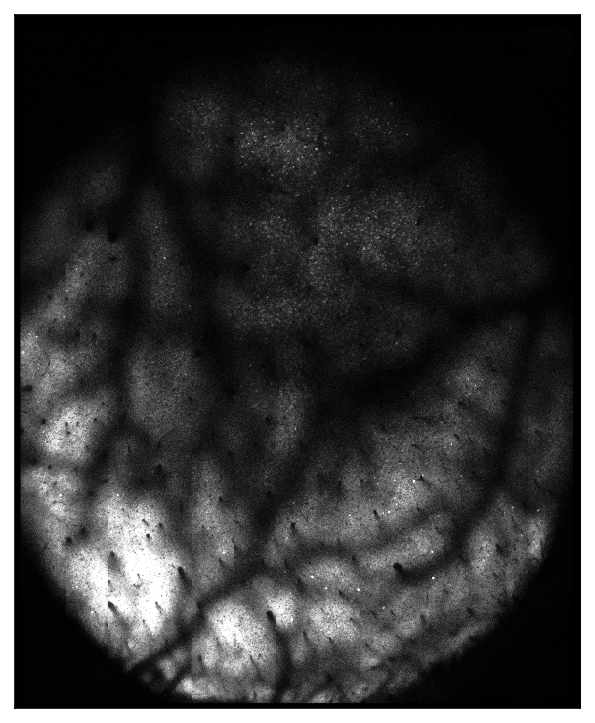

In [24]:
tfu.show_tif(im_full[8])

(<Figure size 1200x900 with 1 Axes>,
 <Axes: >,
 <matplotlib.image.AxesImage at 0x7f01286696a0>)

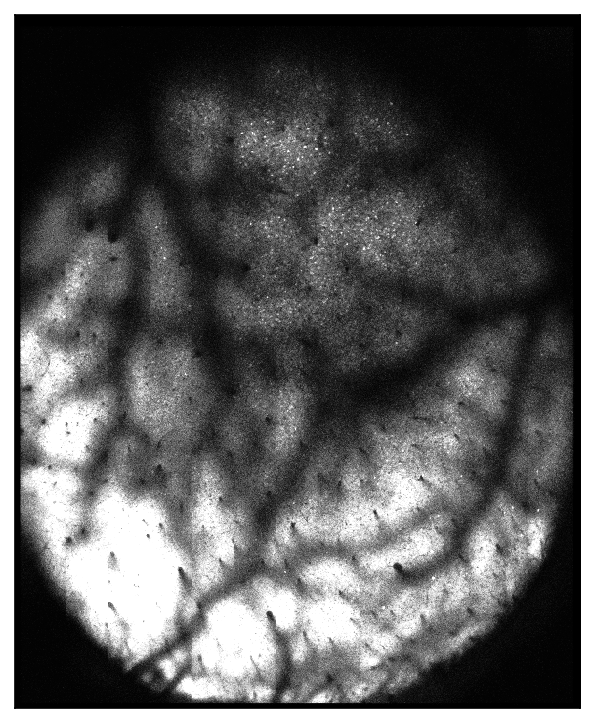

In [15]:
tfu.show_tif(im_full[8], vminmax_percentile=(0,95))